# **Content-Based Multiple Movies Recommender System**

A movie recommender system aims to suggest films to users by analyzing various attributes and behaviors. The recommendations can be personalized, catering to individual tastes and preferences, or they can be generalized, suggesting popular or trending films. Recommender systems are widely used in platforms like Netflix, Amazon Prime, and IMDb to improve user engagement and satisfaction.

### **Type of Recommender Systems**

There are mainly three types of recommender systems:

* Content-Based Filtering: Recommends items similar to those the user has liked in the past.
* Collaborative Filtering: Recommends items based on the preferences of similar users.
* Hybrid Systems: Combine multiple recommendation techniques to improve accuracy and performance.

![](https://www.haulio.io/wp-content/uploads/2020/06/Collaborative-vs-Content-based-filtering.jpg)

### **How Content-Based Filtering Works**

Content-based filtering is a recommendation approach that leverages the content of the items (in this case, movies) to make recommendations. This method analyzes the characteristics of a user’s past interactions with items and suggests new items with similar attributes.

To recommend movies, the system calculates the similarity between the user profile and the items in the database. Techniques like TF-IDF (Term Frequency-Inverse Document Frequency) and cosine similarity are commonly used to measure the similarity between item attributes and the user profile.

# **Table Of Contents**<a name="Top"></a>


---



---


  1. [About the Dataset](#AboutDataset)
  2. [Data Import](#DataImport)
  3. [Data Preprocessing](#Data-preprocessing)
  4. [Recommender System](#RecommenderSystem)
  5. [Saving Model](#SavingModel)

# **1: About the Dataset** <a name="AboutDataset"></a>

---

This is a collection of metadata about the top 10,000 most popular movies on The Movie Database (TMDB) . The dataset includes information such as movie titles, release dates, runtime, genres, production companies, budget, and revenue. This data is collected from TMDB's public API.  

#### **Little bit about TMDB**  
TMDB (The Movie Database) is a popular online database and community platform that provides a vast collection of information about movies, TV shows, and other related content. TMDB allows users to browse and search for movies and TV shows, view information such as cast, crew, synopsis, and ratings, and also contribute to the community by adding their own reviews, ratings, and other content.

The dataset consists of movie details and credits data which has the following attributes,

The credits contains the following features:-

* movie_id - A unique identifier for each movie.
* title - Title of the movie.
* cast - The name of lead and supporting actors.
* crew - The name of Director, Editor, Composer, Writer etc.

The movie details has the following features:-

* budget - The budget in which the movie was made.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* movie_id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* title - Title of the movie.
* vote_average -  average ratings the movie recieved.
* vote_count - the count of votes recieved.


# **2: Data Import** <a name="DataImport"></a>

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import ast
import difflib
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Change the path to point to the location of your data file
credits_data_path = '/content/drive/My Drive/slepet bangkit/ML/Movie Recommendation/dataset/10000 Credits Data'
movies_data_path = '/content/drive/My Drive/slepet bangkit/ML/Movie Recommendation/dataset/10000 Movies Data'

# Read the data file into a Pandas DataFrame
credits = pd.read_csv(credits_data_path)
movies = pd.read_csv(movies_data_path)

In [4]:
# Display the first few rows of the DataFrame
#credits.head()
movies.head()

,Unnamed: 0,Movie_id,title,Genres,release_date,Keywords,overview,poster_path,Budget,Revenue,popularity,vote_average,vote_count
0,0,238,The Godfather,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1972-03-14,"[{'id': 131, 'name': 'italy'}, {'id': 697, 'na...","Spanning the years 1945 to 1955, a chronicle o...",/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,245066411,245066411,93.552,8.7,16814
1,1,278,The Shawshank Redemption,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1994-09-23,"[{'id': 378, 'name': 'prison'}, {'id': 417, 'n...",Framed in the 1940s for the double murder of h...,/q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg,28341469,28341469,78.664,8.7,22542
2,2,240,The Godfather Part II,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1974-12-20,"[{'id': 131, 'name': 'italy'}, {'id': 700, 'na...",In the continuing saga of the Corleone crime f...,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,102600000,102600000,55.752,8.6,10187
3,3,19404,Dilwale Dulhania Le Jayenge,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-10-19,[],"Raj is a rich, carefree, happy-go-lucky second...",/2CAL2433ZeIihfX1Hb2139CX0pW.jpg,100000000,100000000,22.150,8.6,3927
4,4,424,Schindler's List,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",1993-12-15,"[{'id': 818, 'name': 'based on novel or book'}...",The true story of how businessman Oskar Schind...,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,321365567,321365567,53.542,8.6,13382


# **3: Data Preprocessing** <a name="Data-preprocessing"></a>

---

### **Merging datasets**

In [5]:
# prompt: merging dataset from movies and credits
credits=credits.drop("title",axis=1)
movies = movies.merge(credits, on='Movie_id')

In [6]:
movies.shape

(9980, 16)

In [7]:
movies.head()

,Unnamed: 0_x,Movie_id,title,Genres,release_date,Keywords,overview,poster_path,Budget,Revenue,popularity,vote_average,vote_count,Unnamed: 0_y,Cast,Crew
0,0,238,The Godfather,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1972-03-14,"[{'id': 131, 'name': 'italy'}, {'id': 697, 'na...","Spanning the years 1945 to 1955, a chronicle o...",/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,245066411,245066411,93.552,8.7,16814,0,"[{'adult': False, 'gender': 2, 'id': 3084, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
1,1,278,The Shawshank Redemption,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1994-09-23,"[{'id': 378, 'name': 'prison'}, {'id': 417, 'n...",Framed in the 1940s for the double murder of h...,/q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg,28341469,28341469,78.664,8.7,22542,1,"[{'adult': False, 'gender': 2, 'id': 504, 'kno...","[{'adult': False, 'gender': 2, 'id': 153, 'kno..."
2,2,240,The Godfather Part II,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1974-12-20,"[{'id': 131, 'name': 'italy'}, {'id': 700, 'na...",In the continuing saga of the Corleone crime f...,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,102600000,102600000,55.752,8.6,10187,2,"[{'adult': False, 'gender': 2, 'id': 1158, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
3,3,19404,Dilwale Dulhania Le Jayenge,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-10-19,[],"Raj is a rich, carefree, happy-go-lucky second...",/2CAL2433ZeIihfX1Hb2139CX0pW.jpg,100000000,100000000,22.150,8.6,3927,3,"[{'adult': False, 'gender': 2, 'id': 35742, 'k...","[{'adult': False, 'gender': 1, 'id': 8311, 'kn..."
4,4,424,Schindler's List,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",1993-12-15,"[{'id': 818, 'name': 'based on novel or book'}...",The true story of how businessman Oskar Schind...,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,321365567,321365567,53.542,8.6,13382,4,"[{'adult': False, 'gender': 2, 'id': 3896, 'kn...","[{'adult': False, 'gender': 2, 'id': 491, 'kno..."


### **Convert list item into list**

In [8]:
# Procedure for fetching the name from an item
def fetch_name(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [9]:
movies['Keywords']=movies['Keywords'].apply(fetch_name)
movies['Genres']=movies['Genres'].apply(fetch_name)

In [10]:
# Procedure for fetching only 3 names from an item
def fetch_3names(obj):
    L =[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter !=3: # takes maximum 3 cast members
            L.append(i['name'])
            counter+=1
    return L

In [11]:
movies['Cast']=movies['Cast'].apply(fetch_3names)

In [12]:
# This will takes only director from the crew lists
def fetch_directoer(obj):
    L =[]
    for i in ast.literal_eval(obj):
        if i['job']=="Director":
            L.append(i['name'])
            break
    return L

In [13]:
movies['Crew']=movies['Crew'].apply(fetch_directoer)

In [14]:
# Mengisi nilai NaN atau None dengan string kosong
movies['overview'] = movies['overview'].fillna('')

# Mengonversi semua nilai menjadi string
movies['overview'] = movies['overview'].astype(str)

# Memisahkan setiap kata dalam 'overview' menjadi list kata
movies['overview'] = movies['overview'].apply(lambda x: x.split())

In [15]:
# Mengecek hasil dari overview pertama
print(movies['overview'][0])

['Spanning', 'the', 'years', '1945', 'to', '1955,', 'a', 'chronicle', 'of', 'the', 'fictional', 'Italian-American', 'Corleone', 'crime', 'family.', 'When', 'organized', 'crime', 'family', 'patriarch,', 'Vito', 'Corleone', 'barely', 'survives', 'an', 'attempt', 'on', 'his', 'life,', 'his', 'youngest', 'son,', 'Michael', 'steps', 'in', 'to', 'take', 'care', 'of', 'the', 'would-be', 'killers,', 'launching', 'a', 'campaign', 'of', 'bloody', 'revenge.']


In [16]:
movies.head()

,Unnamed: 0_x,Movie_id,title,Genres,release_date,Keywords,overview,poster_path,Budget,Revenue,popularity,vote_average,vote_count,Unnamed: 0_y,Cast,Crew
0,0,238,The Godfather,"[Drama, Crime]",1972-03-14,"[italy, loss of loved one, love at first sight...","[Spanning, the, years, 1945, to, 1955,, a, chr...",/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,245066411,245066411,93.552,8.7,16814,0,"[Marlon Brando, Al Pacino, James Caan]",[Francis Ford Coppola]
1,1,278,The Shawshank Redemption,"[Drama, Crime]",1994-09-23,"[prison, corruption, police brutality, based o...","[Framed, in, the, 1940s, for, the, double, mur...",/q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg,28341469,28341469,78.664,8.7,22542,1,"[Tim Robbins, Morgan Freeman, Bob Gunton]",[Frank Darabont]
2,2,240,The Godfather Part II,"[Drama, Crime]",1974-12-20,"[italy, italian american, cuba, symbolism, gan...","[In, the, continuing, saga, of, the, Corleone,...",/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,102600000,102600000,55.752,8.6,10187,2,"[Al Pacino, Robert Duvall, Diane Keaton]",[Francis Ford Coppola]
3,3,19404,Dilwale Dulhania Le Jayenge,"[Comedy, Drama, Romance]",1995-10-19,[],"[Raj, is, a, rich,, carefree,, happy-go-lucky,...",/2CAL2433ZeIihfX1Hb2139CX0pW.jpg,100000000,100000000,22.150,8.6,3927,3,"[Shah Rukh Khan, Kajol, Amrish Puri]",[Aditya Chopra]
4,4,424,Schindler's List,"[Drama, History, War]",1993-12-15,"[based on novel or book, factory, concentratio...","[The, true, story, of, how, businessman, Oskar...",/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,321365567,321365567,53.542,8.6,13382,4,"[Liam Neeson, Ben Kingsley, Ralph Fiennes]",[Steven Spielberg]


### **Data cleaning**

In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0_x  9980 non-null   int64  
 1   Movie_id      9980 non-null   int64  
 2   title         9980 non-null   object 
 3   Genres        9980 non-null   object 
 4   release_date  9980 non-null   object 
 5   Keywords      9980 non-null   object 
 6   overview      9980 non-null   object 
 7   poster_path   9980 non-null   object 
 8   Budget        9980 non-null   int64  
 9   Revenue       9980 non-null   int64  
 10  popularity    9980 non-null   float64
 11  vote_average  9980 non-null   float64
 12  vote_count    9980 non-null   int64  
 13  Unnamed: 0_y  9980 non-null   int64  
 14  Cast          9980 non-null   object 
 15  Crew          9980 non-null   object 
dtypes: float64(2), int64(6), object(8)
memory usage: 1.2+ MB


In [18]:
# Select selected features
movies = movies[['Movie_id','title','Keywords','Genres','Cast','Crew', 'overview']]

In [19]:
movies.isna().sum().sort_values(ascending=False)

Movie_id    0
title       0
Keywords    0
Genres      0
Cast        0
Crew        0
overview    0
dtype: int64

In [20]:
# Delete null values
movies.dropna(inplace = True)

In [21]:
movies

,Movie_id,title,Keywords,Genres,Cast,Crew,overview
0,238,The Godfather,"[italy, loss of loved one, love at first sight...","[Drama, Crime]","[Marlon Brando, Al Pacino, James Caan]",[Francis Ford Coppola],"[Spanning, the, years, 1945, to, 1955,, a, chr..."
1,278,The Shawshank Redemption,"[prison, corruption, police brutality, based o...","[Drama, Crime]","[Tim Robbins, Morgan Freeman, Bob Gunton]",[Frank Darabont],"[Framed, in, the, 1940s, for, the, double, mur..."
2,240,The Godfather Part II,"[italy, italian american, cuba, symbolism, gan...","[Drama, Crime]","[Al Pacino, Robert Duvall, Diane Keaton]",[Francis Ford Coppola],"[In, the, continuing, saga, of, the, Corleone,..."
3,19404,Dilwale Dulhania Le Jayenge,[],"[Comedy, Drama, Romance]","[Shah Rukh Khan, Kajol, Amrish Puri]",[Aditya Chopra],"[Raj, is, a, rich,, carefree,, happy-go-lucky,..."
4,424,Schindler's List,"[based on novel or book, factory, concentratio...","[Drama, History, War]","[Liam Neeson, Ben Kingsley, Ralph Fiennes]",[Steven Spielberg],"[The, true, story, of, how, businessman, Oskar..."
...,...,...,...,...,...,...,...
9975,384737,Precious Cargo,"[crime boss, heist]","[Action, Crime, Thriller]","[Bruce Willis, Claire Forlani, Mark-Paul Gosse...",[Max Adams],"[After, a, botched, heist,, Eddie, a, murderou..."
9976,282813,The Pyramid,"[monster, darkness, desert, archaeologist, fou...",[Horror],"[Ashley Grace, Denis O'Hare, James Buckley]",[Grégory Levasseur],"[An, archaeological, team, attempt, to, unlock..."
9977,134375,Home Alone: The Holiday Heist,[christmas],"[Comedy, Family, TV Movie]","[Jodelle Ferland, Christian Martyn, Ellie Harvie]",[Peter Hewitt],"[8-year-old, Finn, is, terrified, to, learn, h..."
9978,10477,Driven,"[competition, career, sports, automobile]",[Action],"[Sylvester Stallone, Burt Reynolds, Kip Pardue]",[Renny Harlin],"[Talented, rookie, race-car, driver, Jimmy, Bl..."


### **Create data tags**

In [22]:
# removies the space from the nowns
movies['Genres'] = movies['Genres'].apply(lambda x: [i.replace(" ","") for i in x])
movies['Keywords'] = movies['Keywords'].apply(lambda x: [i.replace(" ","") for i in x])
movies['Cast'] = movies['Cast'].apply(lambda x: [i.replace(" ","") for i in x])
movies['Crew'] = movies['Crew'].apply(lambda x: [i.replace(" ","") for i in x])

In [23]:
# Tags column
movies['tags']= movies['Genres'] + movies['Keywords'] + movies['Cast'] + movies['Crew'] + movies['overview']
movies.head(3)

,Movie_id,title,Keywords,Genres,Cast,Crew,overview,tags
0,238,The Godfather,"[italy, lossoflovedone, loveatfirstsight, base...","[Drama, Crime]","[MarlonBrando, AlPacino, JamesCaan]",[FrancisFordCoppola],"[Spanning, the, years, 1945, to, 1955,, a, chr...","[Drama, Crime, italy, lossoflovedone, loveatfi..."
1,278,The Shawshank Redemption,"[prison, corruption, policebrutality, basedonn...","[Drama, Crime]","[TimRobbins, MorganFreeman, BobGunton]",[FrankDarabont],"[Framed, in, the, 1940s, for, the, double, mur...","[Drama, Crime, prison, corruption, policebruta..."
2,240,The Godfather Part II,"[italy, italianamerican, cuba, symbolism, gang...","[Drama, Crime]","[AlPacino, RobertDuvall, DianeKeaton]",[FrancisFordCoppola],"[In, the, continuing, saga, of, the, Corleone,...","[Drama, Crime, italy, italianamerican, cuba, s..."


In [24]:
# Create cleaned dataframe
cleaned_df = movies[['Movie_id','title','tags']]

# Convert list to string
cleaned_df['tags']=cleaned_df['tags'].apply(lambda x: " ".join(x))

# Change tags to lowercase
cleaned_df['tags'] = cleaned_df['tags'].str.lower()

tags = cleaned_df['tags']
# cleaned_df.head(1)

In [25]:
cleaned_df.duplicated().sum()

0

In [26]:
cleaned_df.shape

(9980, 3)

In [27]:
cleaned_df.tail()

,Movie_id,title,tags
9975,384737,Precious Cargo,action crime thriller crimeboss heist brucewil...
9976,282813,The Pyramid,horror monster darkness desert archaeologist f...
9977,134375,Home Alone: The Holiday Heist,comedy family tvmovie christmas jodelleferland...
9978,10477,Driven,action competition career sports automobile sy...
9979,243688,Poltergeist,horror poltergeist hauntedhouse remake duringc...


# **4: Recommender System** <a name="RecommenderSystem"></a>

---

### **Vectorization**

For any of you who has done even a  bit of text processing before knows we need to convert the word vector of each overview.
Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as
   **(term instances/total instances)**.
Inverse Document Frequency is the relative count of documents containing the term is given as
**log(number of documents/documents with term)**
The overall importance of each word to the documents in which they appear is equal to **TF * IDF**

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines.

In [28]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
vectorizer =TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
tags = tags.fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
feature_vectors=vectorizer.fit_transform(tags)

#Output the shape of tfidf_matrix
feature_vectors.shape

(9980, 52538)

We see that over 50,000 different words were used to describe the 9980 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the [cosine similarity scores](https://en.wikipedia.org/wiki/Cosine_similarity). There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:
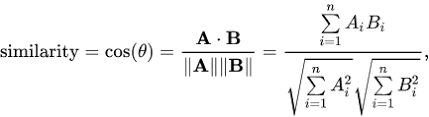

### **Cosine similarity**

![Distance Measured.PNG](https://th.bing.com/th/id/OIP.HON3e3R_UZpxb2P7Bq0_mgHaH1?rs=1&pid=ImgDetMain)

Cosine similarity is a metric used to measure how similar two vectors are by calculating the cosine of the angle between them. It’s widely used in various fields, especially in text analysis, information retrieval, and machine learning, to determine the similarity between two non-zero vectors. The cosine similarity value ranges from -1 to 1, where:

* 1 indicates that the vectors are identical in direction.
* 0 indicates that the vectors are orthogonal (i.e., they are at a 90-degree angle to each other and have no similarity).
* -1 indicates that the vectors are diametrically opposed.

In [29]:
# get the similarity scores
similarity = cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.03725414 0.36780229 ... 0.00889671 0.00204521 0.04501111]
 [0.03725414 1.         0.01128394 ... 0.00665045 0.00686063 0.        ]
 [0.36780229 0.01128394 1.         ... 0.01702415 0.         0.01722798]
 ...
 [0.00889671 0.00665045 0.01702415 ... 1.         0.00698924 0.02380675]
 [0.00204521 0.00686063 0.         ... 0.00698924 1.         0.        ]
 [0.04501111 0.         0.01722798 ... 0.02380675 0.         1.        ]]


In [30]:
similarity.shape

(9980, 9980)

### **Recommender procedure**

In [31]:
def aggregate_features(selected_movie_indices, feature_vectors):
    # Assuming selected_movie_indices is a list of indices for the selected movies
    selected_features = feature_vectors[selected_movie_indices]

    # Choose an aggregation strategy, e.g., taking the mean
    aggregated_features = np.mean(selected_features, axis=0)

    return aggregated_features

In [32]:
def mul_recommander(selected_movie_indices, feature_vectors, movies):
    # Aggregate features for all movie
    aggregated_features = aggregate_features(selected_movie_indices, feature_vectors)

    # Calculate cosine similarity with all movies
    similarity = cosine_similarity(np.asarray(aggregated_features).reshape(1, -1), feature_vectors).flatten() # Bisa langsung pake file pickle similarity


    sorted_indices = np.argsort(similarity)[::-1] #descendant sorting
    recommended_movies = cleaned_df.iloc[sorted_indices]

    return recommended_movies

In [36]:
def recommend_movies(movies_id, number, movies, feature_vectors):
    """
    Fungsi ini menerima daftar ID film dan jumlah film yang ingin ditampilkan.
    Akan mengembalikan dan mencetak film yang direkomendasikan.
    """
    # Memeriksa ID film yang ada dalam data
    valid_movie_ids = [movie for movie in movies_id if movie in cleaned_df['Movie_id'].values]

    if not valid_movie_ids:
        print('Tidak ada film yang sesuai dengan ID yang diberikan.')
        return

    # Mengambil indeks film yang dipilih dari DataFrame movies
    selected_movie_indices = [cleaned_df[cleaned_df['Movie_id'] == movie].index[0] for movie in valid_movie_ids]

    # Menjalankan recommender untuk mendapatkan rekomendasi
    result = mul_recommander(selected_movie_indices, feature_vectors, cleaned_df)

    # Mengambil judul dari film yang dipilih
    selected_titles = cleaned_df[cleaned_df['Movie_id'].isin(movies_id)]['title'].tolist()

    # Menampilkan judul film yang dipilih, setiap judul di baris baru
    print('Selected movies are:')
    print("\n".join(selected_titles))
    print()

    # Mengambil sejumlah judul film yang direkomendasikan, mulai setelah film yang dipilih
    recommended_titles = result['title'].iloc[len(movies_id):len(movies_id) + number].tolist() # kalo mau ngambil Movie_id bisa dirubah parameternya

    # Menampilkan sejumlah film yang direkomendasikan, setiap judul di baris baru
    print(f'{number} recommended movies:')
    print("\n".join(recommended_titles))

In [37]:
# Daftar ID film yang ingin direkomendasikan
movies_id = [1682, 424, 238, 99999999]  # Masukkan ID film yang diinginkan
number_of_recommendations = 10  # Jumlah rekomendasi yang ingin ditampilkan

recommend_movies(movies_id, number_of_recommendations, cleaned_df, feature_vectors)

Selected movies are:
The Godfather
Schindler's List
Mothra vs. Godzilla

10 recommended movies:
[402298, 1678, 242, 13813, 12900, 423, 8056, 7862, 9045, 528949]


# **5: Saving Model** <a name="SavingModel"></a>

---

### **Dump vectors dan similarity matrix to pickle**

In [39]:
pickle.dump(cleaned_df, open('movies_list.pkl', 'wb'))

pickle.dump(similarity, open('similarity.pkl', 'wb'))

pickle.dump(feature_vectors, open('feature_vectors.pkl', 'wb'))